In [ ]:
1. # Problem 1 concerns the locations of shopping centres: find their addresses and translate them into coordinates. Find out the addresses of the 
# following shopping centres (e.g., by using your favourite search engine), and collect them in a text file called shopping_centres.txt: Itis Forum 
# Iso-omena Sello Jumbo REDI Tripla. The text file should be in semicolon-separated format (;) and include the following columns: id (integer) a unique 
# identifier for each shopping centre (a name (string) of each shopping center addr (string) the address


# The text file was created in excel and saved as shopping_centres.csv into the learning_gis/Exercises directory

In [ ]:
2. # Read the list of addresses you just prepared into a pandas.DataFrame called shopping_centres

In [4]:
import pandas as pd


shopping_centres = pd.read_csv(r'C:\Users\acer\Documents\projects\learning_gis\Exercises\shopping_centres.csv')
shopping_centres

,ID,NAME,ADDRESS
0,100,Itis',Itäkatu 1-7 00930 Helsinki Finland'
1,200,Forum',Mannerheimintie 20 00100 Helsinki'
2,300,Iso-Omena',Piispansilta 11 FIN-02230 ESPOO'
3,400,Sello',Leppävaarankatu 3-9 02600 Espoo Finland'
4,500,Jumbo',Vantaanportinkatu 3 01510 Vantaa Finland'
5,600,REDI',Hermannin rantatie 5 00580 Helsinki Finland'
6,700,Tripla',Fredikanterassi 1 00520 Helsinki Finland'


In [ ]:
3. # Geocode the addresses using the Nominatim geocoding service. Join the results with the input data, and store them in a geopandas.GeoDataFrame with
# the same name (shopping_centres). Check that the coordinate reference system of the geocoded result is correctly defined, and reproject the 
# layer into ETRS GK-25 (EPSG:3879):

In [5]:
import geopandas as gpd

# geocodes the addresses using nominatim service

geocoded_address = gpd.tools.geocode(
    shopping_centres['ADDRESS'],
    provider= 'nominatim',
    user_agent = 'dowlings',
    timeout = 10

)

geocoded_address

,geometry,address
0,POINT (25.07908 60.21027),"Huoneistokeskus, 1-7, Itäkatu, Itäkeskus, Vart..."
1,POINT (24.93801 60.16937),"Carlings, 20, Mannerheimintie, Keskusta, Kluuv..."
2,POINT EMPTY,None
3,POINT (24.81150 60.21812),"Bik Bok, 3-9, Leppävaarankatu, Säteri, Etelä-L..."
4,POINT (24.96282 60.29245),"Stockmann, 3, Vantaanportinkatu, Vantaanportti..."
5,POINT (24.97999 60.18670),"JYSK, 5, Hermannin rantatie, Verkkosaari, Kala..."
6,POINT (24.93136 60.19821),"Original Sokos Hotel Tripla, 1, Fredikanterass..."


In [6]:
# joining initial data with geocoded address stored in a geopandas df

shopping_centres = geocoded_address.join(shopping_centres)
shopping_centres

,geometry,address,ID,NAME,ADDRESS
0,POINT (25.07908 60.21027),"Huoneistokeskus, 1-7, Itäkatu, Itäkeskus, Vart...",100,Itis',Itäkatu 1-7 00930 Helsinki Finland'
1,POINT (24.93801 60.16937),"Carlings, 20, Mannerheimintie, Keskusta, Kluuv...",200,Forum',Mannerheimintie 20 00100 Helsinki'
2,POINT EMPTY,None,300,Iso-Omena',Piispansilta 11 FIN-02230 ESPOO'
3,POINT (24.81150 60.21812),"Bik Bok, 3-9, Leppävaarankatu, Säteri, Etelä-L...",400,Sello',Leppävaarankatu 3-9 02600 Espoo Finland'
4,POINT (24.96282 60.29245),"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",500,Jumbo',Vantaanportinkatu 3 01510 Vantaa Finland'
5,POINT (24.97999 60.18670),"JYSK, 5, Hermannin rantatie, Verkkosaari, Kala...",600,REDI',Hermannin rantatie 5 00580 Helsinki Finland'
6,POINT (24.93136 60.19821),"Original Sokos Hotel Tripla, 1, Fredikanterass...",700,Tripla',Fredikanterassi 1 00520 Helsinki Finland'


In [7]:
# there is a duplicate column name 'address' in the gdf which will run an error later when writing it to a new file, hence one as to be renamed

# renames the initials address column to a different name

shopping_centres.rename(columns={'ADDRESS': 'ADDR'}, inplace= True)
shopping_centres


,geometry,address,ID,NAME,ADDR
0,POINT (25.07908 60.21027),"Huoneistokeskus, 1-7, Itäkatu, Itäkeskus, Vart...",100,Itis',Itäkatu 1-7 00930 Helsinki Finland'
1,POINT (24.93801 60.16937),"Carlings, 20, Mannerheimintie, Keskusta, Kluuv...",200,Forum',Mannerheimintie 20 00100 Helsinki'
2,POINT EMPTY,None,300,Iso-Omena',Piispansilta 11 FIN-02230 ESPOO'
3,POINT (24.81150 60.21812),"Bik Bok, 3-9, Leppävaarankatu, Säteri, Etelä-L...",400,Sello',Leppävaarankatu 3-9 02600 Espoo Finland'
4,POINT (24.96282 60.29245),"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",500,Jumbo',Vantaanportinkatu 3 01510 Vantaa Finland'
5,POINT (24.97999 60.18670),"JYSK, 5, Hermannin rantatie, Verkkosaari, Kala...",600,REDI',Hermannin rantatie 5 00580 Helsinki Finland'
6,POINT (24.93136 60.19821),"Original Sokos Hotel Tripla, 1, Fredikanterass...",700,Tripla',Fredikanterassi 1 00520 Helsinki Finland'


In [8]:
# checking the crs of the geocoded result and reprojecting it to  ETRS GK-25 (EPSG:3879)

crs = geocoded_address.crs
crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
# reprojecting crs

reproject = geocoded_address.to_crs('EPSG:3879', inplace =True)
reproject

In [10]:
geocoded_address.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
4. # Save shopping_centres as a GeoPackage named shopping_centres.gpkg:

In [11]:
write = shopping_centres.to_file(r'C:\Users\acer\Documents\projects\learning_gis\Exercises\shopping_centres.gpkg')

write

In [ ]:
'''SECOND PART OF EXERCISE: Create buffers around shopping centers '''

In [ ]:
5. # First, load the shopping centre point data set you created in problem 1 into a GeoDataFrame called shopping_centres.

In [2]:
import geopandas as gpd

shopping_centres = gpd.read_file(r'C:\Users\acer\Documents\projects\learning_gis\Exercises\shopping_centres.gpkg')

# crs is EPSG 4326 AND HAS TO BE REPROJECTED
shopping_centres.to_crs('EPSG:3879', inplace = True)
shopping_centres

,address,ID,NAME,ADDR,geometry
0,"Huoneistokeskus, 1-7, Itäkatu, Itäkeskus, Vart...",100,Itis',Itäkatu 1-7 00930 Helsinki Finland',POINT (25504384.737 6677502.772)
1,"Carlings, 20, Mannerheimintie, Keskusta, Kluuv...",200,Forum',Mannerheimintie 20 00100 Helsinki',POINT (25496558.626 6672944.388)
2,None,300,Iso-Omena',Piispansilta 11 FIN-02230 ESPOO',None
3,"Bik Bok, 3-9, Leppävaarankatu, Säteri, Etelä-L...",400,Sello',Leppävaarankatu 3-9 02600 Espoo Finland',POINT (25489551.290 6678388.954)
4,"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",500,Jumbo',Vantaanportinkatu 3 01510 Vantaa Finland',POINT (25497943.932 6686656.982)
5,"JYSK, 5, Hermannin rantatie, Verkkosaari, Kala...",600,REDI',Hermannin rantatie 5 00580 Helsinki Finland',POINT (25498889.845 6674874.269)
6,"Original Sokos Hotel Tripla, 1, Fredikanterass...",700,Tripla',Fredikanterassi 1 00520 Helsinki Finland',POINT (25496192.733 6676158.022)


In [3]:
# reprojected crs
shopping_centres.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
6. # Calculate a 1.5 km buffer for each geocoded point. Overwrite the geometry column with the new buffer geometry. Use the geopandas.GeoDataFrame.buffer() 
# method, that uses shapely’s buffer() in the background. You only need to care about the distance parameter, don’t worry about the possible other 
# arguments.

In [4]:
# creating a 1.5km buffer aroung the points while overwriting the geometry column

shopping_centres['geometry'] = shopping_centres.buffer(distance = 1500)

# printing the data frame shows the overwrtten buffered geometries
shopping_centres

,address,ID,NAME,ADDR,geometry
0,"Huoneistokeskus, 1-7, Itäkatu, Itäkeskus, Vart...",100,Itis',Itäkatu 1-7 00930 Helsinki Finland',"POLYGON ((25505884.737 6677502.772, 25505877.5..."
1,"Carlings, 20, Mannerheimintie, Keskusta, Kluuv...",200,Forum',Mannerheimintie 20 00100 Helsinki',"POLYGON ((25498058.626 6672944.388, 25498051.4..."
2,None,300,Iso-Omena',Piispansilta 11 FIN-02230 ESPOO',None
3,"Bik Bok, 3-9, Leppävaarankatu, Säteri, Etelä-L...",400,Sello',Leppävaarankatu 3-9 02600 Espoo Finland',"POLYGON ((25491051.290 6678388.954, 25491044.0..."
4,"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",500,Jumbo',Vantaanportinkatu 3 01510 Vantaa Finland',"POLYGON ((25499443.932 6686656.982, 25499436.7..."
5,"JYSK, 5, Hermannin rantatie, Verkkosaari, Kala...",600,REDI',Hermannin rantatie 5 00580 Helsinki Finland',"POLYGON ((25500389.845 6674874.269, 25500382.6..."
6,"Original Sokos Hotel Tripla, 1, Fredikanterass...",700,Tripla',Fredikanterassi 1 00520 Helsinki Finland',"POLYGON ((25497692.733 6676158.022, 25497685.5..."


<Axes: >

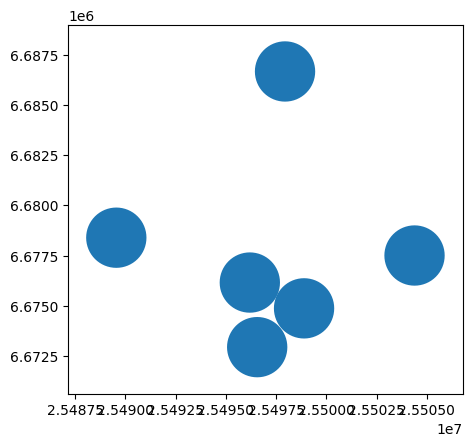

In [5]:
shopping_centres.plot()

In [ ]:
7. # Save the data frame containing the buffer geometries into a new layer buffers inside the same GeoPackage shopping_centres.gpkg

In [ ]:
# NB//: Overwriting the original file (shopping_centres.gpkg ) wasn't working, so I had it saved to a new file, buffered_zones

In [17]:
write_file = shopping_centres.to_file(r'C:\Users\acer\Documents\projects\learning_gis\Exercises\buffered_zones.gpkg', layer = 'buffers', driver= 'GPKG')

write_file

In [ ]:
 ### In the last step of this analysis, use a spatial join to relate data from a population grid data set to the buffer layer created in problem 2 ### 

In [ ]:
8.# Use the same population grid data set as during lesson 3 (don’t forget to assign a CRS). Load the data into a GeoDataFrame called population_grid.

In [20]:

population_grid = gpd.read_file(r'C:\Users\acer\Documents\projects\learning_gis\shp\grid.shp')

population_grid

,INDEX,ASUKKAITA,ASVALJYYS,IKA0_9,IKA10_19,IKA20_29,IKA30_39,IKA40_49,IKA50_59,IKA60_69,IKA70_79,IKA_YLI80,geometry
0,688,5,5.060000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6689749.005, 25472499.9..."
1,703,5,5.140000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
2,710,8,4.450000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
3,711,7,6.414000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
4,715,10,4.520000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6682998.998, 25472499.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5833,27109,6,3.889000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25513249.999 6685998.998, 25513249.9..."
5834,27110,13,2.486000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25513249.999 6685748.999, 25513249.9..."
5835,27111,12,5.944000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25513249.999 6685499.000, 25513249.9..."
5836,27273,6,2.417000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25513499.996 6685499.000, 25513499.9..."


In [21]:
# not all the data will be nedded, hence specific columns will be selected

columns = population_grid[['ASUKKAITA', 'geometry']]
columns = columns.rename(columns={'ASUKKAITA': 'Population'}) # changing the column name from finish to English
columns

,Population,geometry
0,5,"POLYGON ((25472499.995 6689749.005, 25472499.9..."
1,5,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
2,8,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
3,7,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
4,10,"POLYGON ((25472499.995 6682998.998, 25472499.9..."
...,...,...
5833,6,"POLYGON ((25513249.999 6685998.998, 25513249.9..."
5834,13,"POLYGON ((25513249.999 6685748.999, 25513249.9..."
5835,12,"POLYGON ((25513249.999 6685499.000, 25513249.9..."
5836,6,"POLYGON ((25513499.996 6685499.000, 25513499.9..."


In [22]:
population_grid.crs         #checking and assigning a crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# Loading the buffers computed in problem 2 into a GeoDataFrame called shopping_centre_buffers. Add an assert statement to check whether the two
# data frames are in the same CRS.

In [23]:
shopping_centre_buffers = gpd.read_file(r'C:\Users\acer\Documents\projects\learning_gis\Exercises\buffered_zones.gpkg')

shopping_centre_buffers

,address,ID,NAME,ADDR,geometry
0,"Huoneistokeskus, 1-7, Itäkatu, Itäkeskus, Vart...",100,Itis',Itäkatu 1-7 00930 Helsinki Finland',"POLYGON ((25505884.737 6677502.772, 25505877.5..."
1,"Carlings, 20, Mannerheimintie, Keskusta, Kluuv...",200,Forum',Mannerheimintie 20 00100 Helsinki',"POLYGON ((25498058.626 6672944.388, 25498051.4..."
2,None,300,Iso-Omena',Piispansilta 11 FIN-02230 ESPOO',None
3,"Bik Bok, 3-9, Leppävaarankatu, Säteri, Etelä-L...",400,Sello',Leppävaarankatu 3-9 02600 Espoo Finland',"POLYGON ((25491051.290 6678388.954, 25491044.0..."
4,"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",500,Jumbo',Vantaanportinkatu 3 01510 Vantaa Finland',"POLYGON ((25499443.932 6686656.982, 25499436.7..."
5,"JYSK, 5, Hermannin rantatie, Verkkosaari, Kala...",600,REDI',Hermannin rantatie 5 00580 Helsinki Finland',"POLYGON ((25500389.845 6674874.269, 25500382.6..."
6,"Original Sokos Hotel Tripla, 1, Fredikanterass...",700,Tripla',Fredikanterassi 1 00520 Helsinki Finland',"POLYGON ((25497692.733 6676158.022, 25497685.5..."


In [25]:
assert shopping_centre_buffers.crs == population_grid.crs, 'The crs are not identical'


# this line of code did not throw an error, hence crs are identical

In [ ]:
9.# Join the shopping centre’s id column (and others, if you want) to the population grid data frame, for all population grid cells that are within the 
# buffer area of each shopping centre. Use a join-type that retains only rows from both input data frames for which the geometric predicate is true.

In [42]:
joined_data = gpd.sjoin(columns, shopping_centres, how='inner', predicate='within')

joined_data

,Population,geometry,index_right,address,ID,NAME,ADDR
1963,177,"POLYGON ((25488249.995 6678249.005, 25488249.9...",3,"Bik Bok, 3-9, Leppävaarankatu, Säteri, Etelä-L...",400,Sello',Leppävaarankatu 3-9 02600 Espoo Finland'
1964,301,"POLYGON ((25488249.995 6677999.006, 25488249.9...",3,"Bik Bok, 3-9, Leppävaarankatu, Säteri, Etelä-L...",400,Sello',Leppävaarankatu 3-9 02600 Espoo Finland'
1965,22,"POLYGON ((25488249.995 6677748.997, 25488249.9...",3,"Bik Bok, 3-9, Leppävaarankatu, Säteri, Etelä-L...",400,Sello',Leppävaarankatu 3-9 02600 Espoo Finland'
2002,16,"POLYGON ((25488499.993 6678499.004, 25488499.9...",3,"Bik Bok, 3-9, Leppävaarankatu, Säteri, Etelä-L...",400,Sello',Leppävaarankatu 3-9 02600 Espoo Finland'
2003,5,"POLYGON ((25488499.993 6677748.997, 25488499.9...",3,"Bik Bok, 3-9, Leppävaarankatu, Säteri, Etelä-L...",400,Sello',Leppävaarankatu 3-9 02600 Espoo Finland'
...,...,...,...,...,...,...,...
5240,81,"POLYGON ((25505250.000 6676998.999, 25505250.0...",0,"Huoneistokeskus, 1-7, Itäkatu, Itäkeskus, Vart...",100,Itis',Itäkatu 1-7 00930 Helsinki Finland'
5241,39,"POLYGON ((25505250.000 6676749.000, 25505250.0...",0,"Huoneistokeskus, 1-7, Itäkatu, Itäkeskus, Vart...",100,Itis',Itäkatu 1-7 00930 Helsinki Finland'
5295,655,"POLYGON ((25505499.998 6677748.997, 25505499.9...",0,"Huoneistokeskus, 1-7, Itäkatu, Itäkeskus, Vart...",100,Itis',Itäkatu 1-7 00930 Helsinki Finland'
5296,349,"POLYGON ((25505499.998 6677498.998, 25505499.9...",0,"Huoneistokeskus, 1-7, Itäkatu, Itäkeskus, Vart...",100,Itis',Itäkatu 1-7 00930 Helsinki Finland'


In [ ]:
10. # Group the resulting (joint) data frame by shopping centre (id or name), and calculate the sum() of the population living inside the 1.5 km 
# radius around them.Print the results, for instance, in the form "12345 people live within 1.5 km from REDI".

In [60]:
# Group by shopping centre name and calculate the sum of population
grouped_data = joined_data.groupby('NAME')['Population'].sum()

In [62]:
for shopping_centre_name, population_sum in grouped_data.items():
    print(f"{population_sum} people live within 1.5 km from Shopping Centre {shopping_centre_name}.")

54864 people live within 1.5 km from Shopping Centre Forum'.
18507 people live within 1.5 km from Shopping Centre Itis'.
11718 people live within 1.5 km from Shopping Centre Jumbo'.
28877 people live within 1.5 km from Shopping Centre REDI'.
25240 people live within 1.5 km from Shopping Centre Sello'.
24041 people live within 1.5 km from Shopping Centre Tripla'.
